In [1]:
import os
import urllib.request
from species import SpeciesInit
from species.data.database import Database
from species.fit.fit_model import FitModel
from species.read.read_model import ReadModel
from species.plot.plot_mcmc import plot_posterior
from species.plot.plot_spectrum import plot_spectrum
from species.util.box_util import update_objectbox
from species.util.fit_util import get_residuals, multi_photometry

SpeciesInit()

[osx-summer2410.stsci.edu:32401] shmem: mmap: an error occurred while determining whether or not /var/folders/36/1_bs4p6d4t73n8bdrm6msfsr0005tr/T//ompi.osx-summer2410.5976/jf.0/1324089344/sm_segment.osx-summer2410.5976.4eec0000.0 could be created.


species v0.8.4

Working folder: /Users/bseamons/Documents/Research

Configuration file: /Users/bseamons/Documents/Research/species_config.ini
Database file: /Users/bseamons/Documents/Research/species_database.hdf5
Data folder: /Users/bseamons/Documents/Research/data

Configuration settings:
   - Database: /Users/bseamons/Documents/Research/species_database.hdf5
   - Data folder: /Users/bseamons/Documents/Research/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [2]:
database = Database()
database.available_models()


-----------------------
Available model spectra
-----------------------

   - AMES-Cond:
      - Label = ames-cond
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [100, 6600]
      - Wavelength range (um): [0.5, 40]
      - Sampling (lambda/d_lambda): 4000
      - File size: 150 MB

   - AMES-Dusty:
      - Label = ames-dusty
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [500, 4000]
      - Wavelength range (um): [0.5, 40]
      - Sampling (lambda/d_lambda): 4000
      - File size: 58 MB

   - ATMO:
      - Label = atmo
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavelength range (um): [0.4, 6000]
      - Sampling (lambda/d_lambda): 1000
      - File size: 45 MB
      - Reference: Phillips et al. (2020)
      - URL: https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P

   - ATMO CEQ:
      - Label = atmo-ceq
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavele

{'ames-cond': {'parameters': ['teff', 'logg'],
  'name': 'AMES-Cond',
  'file size': '150 MB',
  'wavelength range': [0.5, 40],
  'lambda/d_lambda': 4000,
  'teff range': [100, 6600]},
 'ames-dusty': {'parameters': ['teff', 'logg'],
  'name': 'AMES-Dusty',
  'file size': '58 MB',
  'wavelength range': [0.5, 40],
  'lambda/d_lambda': 4000,
  'teff range': [500, 4000]},
 'atmo': {'parameters': ['teff', 'logg'],
  'name': 'ATMO',
  'file size': '45 MB',
  'wavelength range': [0.4, 6000],
  'lambda/d_lambda': 1000,
  'teff range': [200, 3000],
  'reference': 'Phillips et al. (2020)',
  'url': 'https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P'},
 'atmo-ceq': {'parameters': ['teff', 'logg'],
  'name': 'ATMO CEQ',
  'file size': '455 MB',
  'wavelength range': [0.2, 6000],
  'lambda/d_lambda': 10000,
  'teff range': [200, 3000],
  'reference': 'Phillips et al. (2020)',
  'url': 'https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P'},
 'atmo-neq-weak': {'parameters': ['teff', 'logg']

In [28]:
#database.add_model(model = 'sonora-elfowl-y', teff_range = (300., 550.))
database.add_model(model = 'exo-rem', teff_range = (400., 900.))


-------------------------
Add grid of model spectra
-------------------------

Database tag: exo-rem
Model name: Exo-REM


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/data/model_data/model_spectra.py:107: UserWarning: The Exo-Rem grid has been updated to the latest version from https://lesia.obspm.fr/exorem/YGP_grids/. Please consider removing the grid from the 'data_folder' if needed such that the latest version of the grid will be downloaded and added to the HDF5 database.
  warnings.warn(



Unpacking 3189/9575 model spectra from Exo-REM (643 MB)...

/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/data_util.py:73: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path, members=member_list, numeric_owner=numeric_owner)


 [DONE]

Please cite Charnay et al. (2018) when using Exo-REM in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2018ApJ...854..172C

Wavelength range (um) = 0.35 - 250.0
Sampling (lambda/d_lambda) = 500
Teff range (K) = 400.0 - 900.0

Adding Exo-REM model spectra... data/exo-rem/exo-rem_teff_900_logg_5.0_feh_1.0_co_0.80_spec.dat 

Grid points stored in the database:
   - Teff = [400. 450. 500. 550. 600. 650. 700. 750. 800. 850. 900.]
   - log(g) = [3.  3.5 4.  4.5 5. ]
   - [Fe/H] = [-0.5  0.   0.5  1. ]
   - C/O = [0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8 ]

Number of grid points per parameter:
   - teff: 11
   - logg: 5
   - feh: 4
   - c_o_ratio: 15

Number of stored grid points: 3300
Number of interpolated grid points: 0
Number of missing grid points: 0


In [6]:
database.add_object('WISE J225540', parallax = (70.7, 4.2), flux_density = None,
                    spectrum = {'MOSFIRE': ('Flux_cal_JHK_2M2255-3118_species_units.txt', None, 3529.)}, deredden = None)


----------
Add object
----------

Object name: WISE J225540
Units: None
Deredden: None
Parallax (mas) = 70.70 +/- 4.20

Spectra:
   - Spectrum:
      - Database tag: MOSFIRE
      - Filename: Flux_cal_JHK_2M2255-3118_species_units.txt
      - Data shape: (6122, 3)
      - Wavelength range (um): 1.11 - 2.40
      - Mean flux (W m-2 um-1): 1.15e-24
      - Mean error (W m-2 um-1): 4.21e-25
   - Instrument resolution:
      - MOSFIRE: 3529.0


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/data/database.py:1399: UserWarning: Transposing the data of MOSFIRE because the first instead of the second axis has a length of 3.
  warnings.warn(


In [7]:
fit = FitModel(object_name = 'WISE J225540', model = 'exo-rem',
               bounds = {'teff': (400., 1000.), 'logg': (3.5, 5.5)})


-----------------
Fit model spectra
-----------------

Object name: WISE J225540
Model tag: exo-rem
Binary star: False
Blackbody components: 0
Teff interpolation range: (400.0, 1000.0)

Interpolating MOSFIRE... [DONE]

Fitting 6 parameters:
   - teff
   - logg
   - feh
   - c_o_ratio
   - radius
   - parallax

Uniform priors (min, max):
   - teff = (400.0, 600.0)
   - logg = (3.5, 5.0)
   - feh = (-0.5, 1.0)
   - c_o_ratio = (0.1, 0.8)
   - radius = (0.5, 5.0)

Normal priors (mean, sigma):
   - parallax = 70.70 +/- 4.20

Weights for the log-likelihood function:
   - MOSFIRE = 1.00


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/fit/fit_model.py:639: UserWarning: The upper bound on teff (1000.0) is larger than the upper bound from the available exo-rem model grid (600.0). The bound of the teff prior will be adjusted to 600.0.
  warnings.warn(
/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/fit/fit_model.py:639: UserWarning: The upper bound on logg (5.5) is larger than the upper bound from the available exo-rem model grid (5.0). The bound of the logg prior will be adjusted to 5.0.
  warnings.warn(


In [8]:
fit.run_multinest(tag = 'WISE J225540', n_live_points = 500)

  6%|█▉                                 | 2.14G/38.6G [17:05<4:50:41, 2.09MB/s]


------------------------------
Nested sampling with MultiNest
------------------------------

Database tag: WISE J225540
Number of live points: 500
Resume previous fit: False
Output folder: multinest/

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  500
 dimensionality =    6
 *****************************************************



 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter            5  of mode            1  is converging towards the ed

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 67;
tau: [157.56149837]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 67;
tau: [197.55198092]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 67;
tau: [476.61047921]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 67;
tau: [150.72145945]


  analysing data from multinest/.txt ln(ev)=   279353.16683939041      +/-  0.66232184470678768     
 Total Likelihood Evaluations:       361788
 Sampling finished. Exiting MultiNest


Nested sampling global log-evidence: 279353.17 +/- 0.66
Nested importance sampling global log-evidence: 279353.94 +/- 0.07

Sample with the maximum likelihood:
   - Log-likelihood = 279576.32
   - teff = 401.23
   - logg = 3.51
   - feh = -0.50
   - c_o_ratio = 0.31
   - radius = 0.51
   - parallax = 0.33

---------------------
Add posterior samples
---------------------

Database tag: WISE J225540
Sampler: multinest
Samples shape: (3366, 6)
Ln(Z): 279353.17 +/- 0.66

Integrated autocorrelation time:
   - teff: 157.56
   - logg: 197.55
   - feh: 476.61
   - c_o_ratio: 61.59
   - radius: 150.72
   - parallax: 3.03



---------------------
Get posterior samples
---------------------

Database tag: WISE J225540
Random samples: None
Samples shape: (3366, 6)

Parameters:
   - teff
   - logg
   - feh
   - c_o_ratio
   - radius
   - parallax

Uniform priors (min, max):
   - c_o_ratio = (0.1, 0.8)
   - feh = (-0.5, 1.0)
   - logg = (3.5, 5.0)
   - radius = (0.5, 5.0)
   - teff = (400.0, 600.0)

Normal priors (mean, sigma):
   - parallax = (70.7, 4.2)

----------------------------
Plot posterior distributions
----------------------------

Database tag: WISE J225540
Object type: planet
Manual parameters: None

Median parameters:
   - teff = 4.01e+02
   - logg = 3.51e+00
   - feh = -4.98e-01
   - c_o_ratio = 3.11e-01
   - radius = 5.08e-01
   - parallax = 3.34e-01

Sample with highest probability:
   - teff = 4.01e+02
   - logg = 3.51e+00
   - feh = -4.98e-01
   - c_o_ratio = 3.11e-01
   - radius = 5.08e-01
   - parallax = 3.34e-01


  2%|▌                                   | 651M/38.6G [01:29<1:27:11, 7.25MB/s]


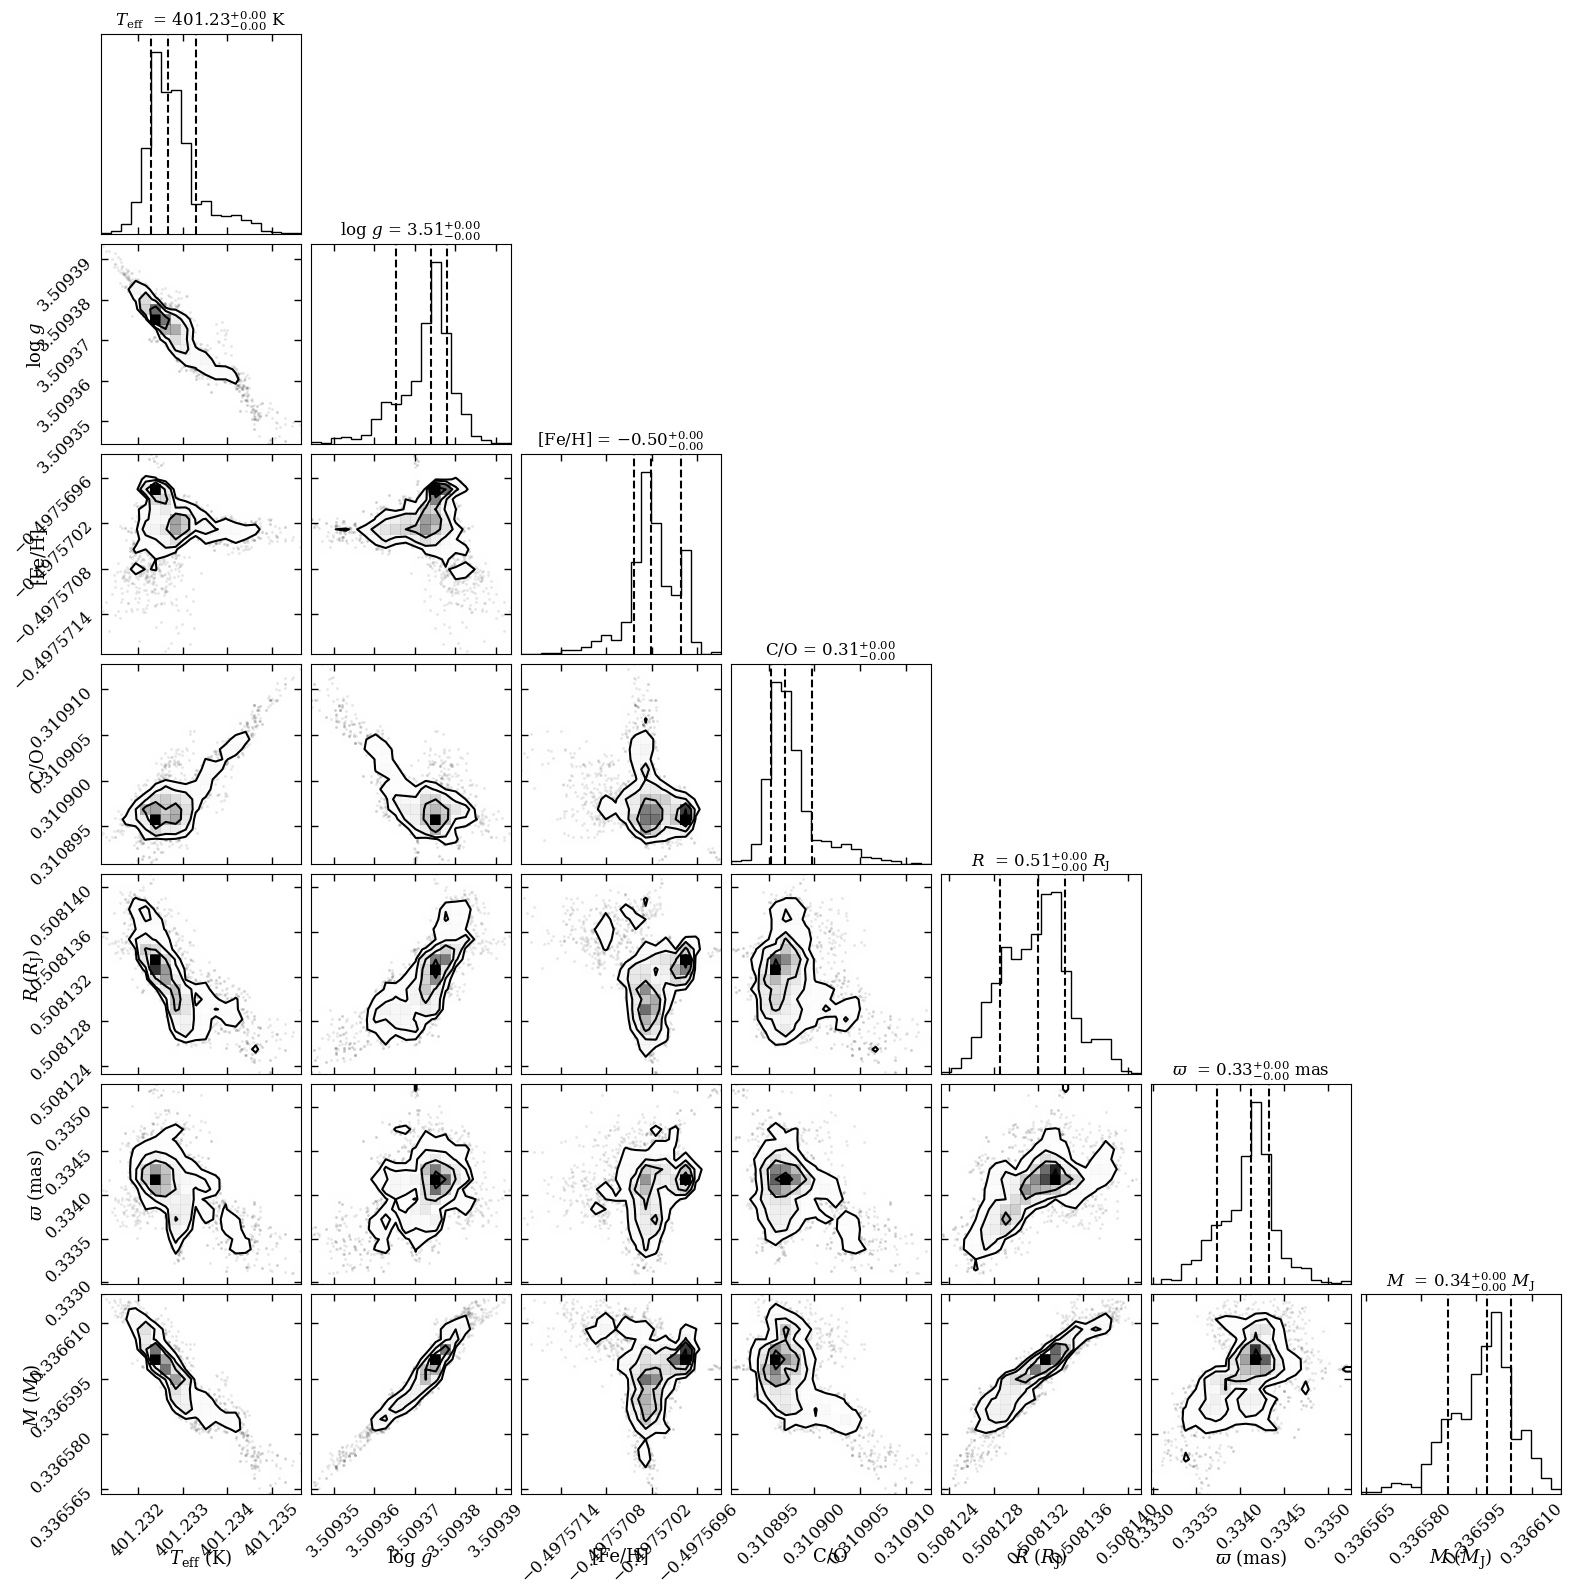

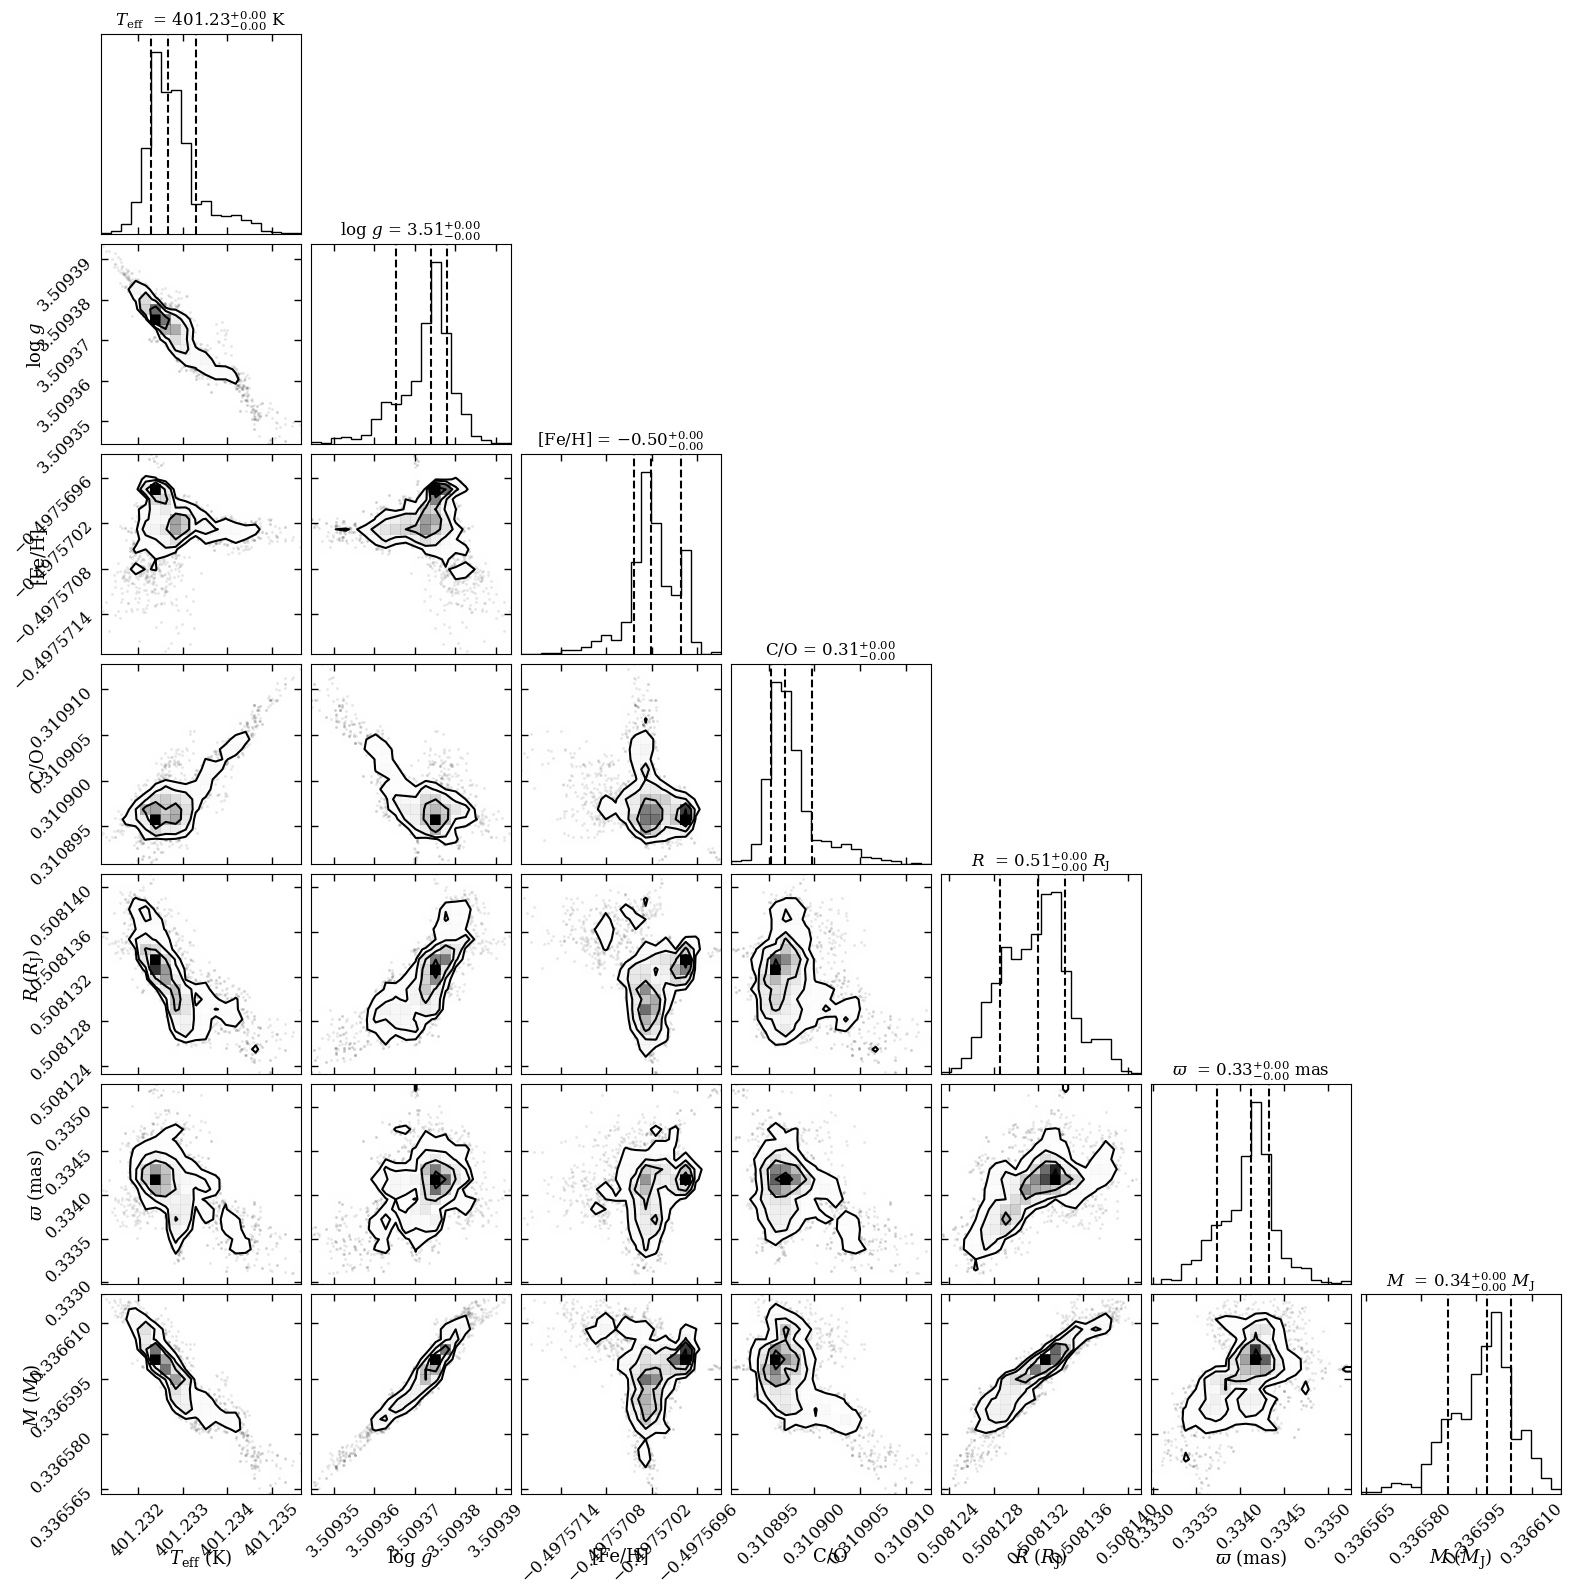

In [18]:
plot_posterior(tag = 'WISE J225540', inc_mass = True, output = None, title_fmt = ['.2f', '.2f', '.2f', '.2f', '.2f', '.2f', '.2f'])

In [19]:
samples = database.get_mcmc_spectra(tag = 'WISE J225540', random = 30, wavel_range = None)


---------------------
Get posterior spectra
---------------------

Database tag: WISE J225540
Number of samples: 30
Wavelength range (um): None
Resolution: None



  0%|          | 0/30 [00:00<?, ?it/s]

In [20]:
best = database.get_median_sample(tag = 'WISE J225540')


---------------------
Get median parameters
---------------------

Database tag: WISE J225540

Parameters:
   - teff = 401.23
   - logg = 3.51
   - feh = -0.50
   - c_o_ratio = 0.31
   - radius = 0.51
   - parallax = 0.33


In [21]:
read_model = ReadModel(model = 'exo-rem', wavel_range = None)

In [22]:
modelbox = read_model.get_model(model_param = best, spec_res = 3529., smooth = True)

/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/read/read_model.py:613: DeprecationWarning: The 'smooth' parameter has been deprecated. Please set only the 'spec_res' argument, which can be set to None for not applying a smoothing.
  warnings.warn(


In [23]:
objectbox = database.get_object(object_name = 'WISE J225540', inc_spec = True)


----------
Get object
----------

Object name: WISE J225540
Include photometry: True
Include spectra: True


In [24]:
objectbox = update_objectbox(objectbox = objectbox, model_param = best)


----------------
Update ObjectBox
----------------



In [25]:
residuals = get_residuals(tag = 'WISE J225540', datatype = 'model', spectrum = 'exo-rem', parameters = best, objectbox = objectbox, inc_spec = True)


-------------------
Calculate residuals
-------------------


Model: exo-rem
Binary: False

Model parameters:
   - teff
   - logg
   - feh
   - c_o_ratio
   - radius
   - parallax

Fixed parameters: none

Include photometry: True
Include spectra: True

Residuals (sigma):
   - MOSFIRE: min = -12.55, max = 22.20

Number of data points = 6122
Number of model parameters = 6
Number of fixed parameters = 0
Number of degrees of freedom = 6116

chi2 = 121799.06
reduced chi2 = 19.91


/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/fit_util.py:267: DeprecationWarning: The 'datatype' parameter is no longer used by the 'get_residuals' function. Instead, the 'tag' parameter should be set, which points to the sampling results as stored in the database.
  warnings.warn(
/opt/miniconda3/envs/species/lib/python3.12/site-packages/species/util/fit_util.py:277: DeprecationWarning: The 'spectrum' parameter is no longer used by the 'get_residuals' function. Instead, the 'tag' parameter should be set, which points to the sampling results as stored in the database.
  warnings.warn(



-------------
Plot spectrum
-------------

Boxes:
   - ObjectBox
   - ModelBox

Object type: star
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: None

Figure size: (20, 12)
Legend parameters: None
Include model name: False


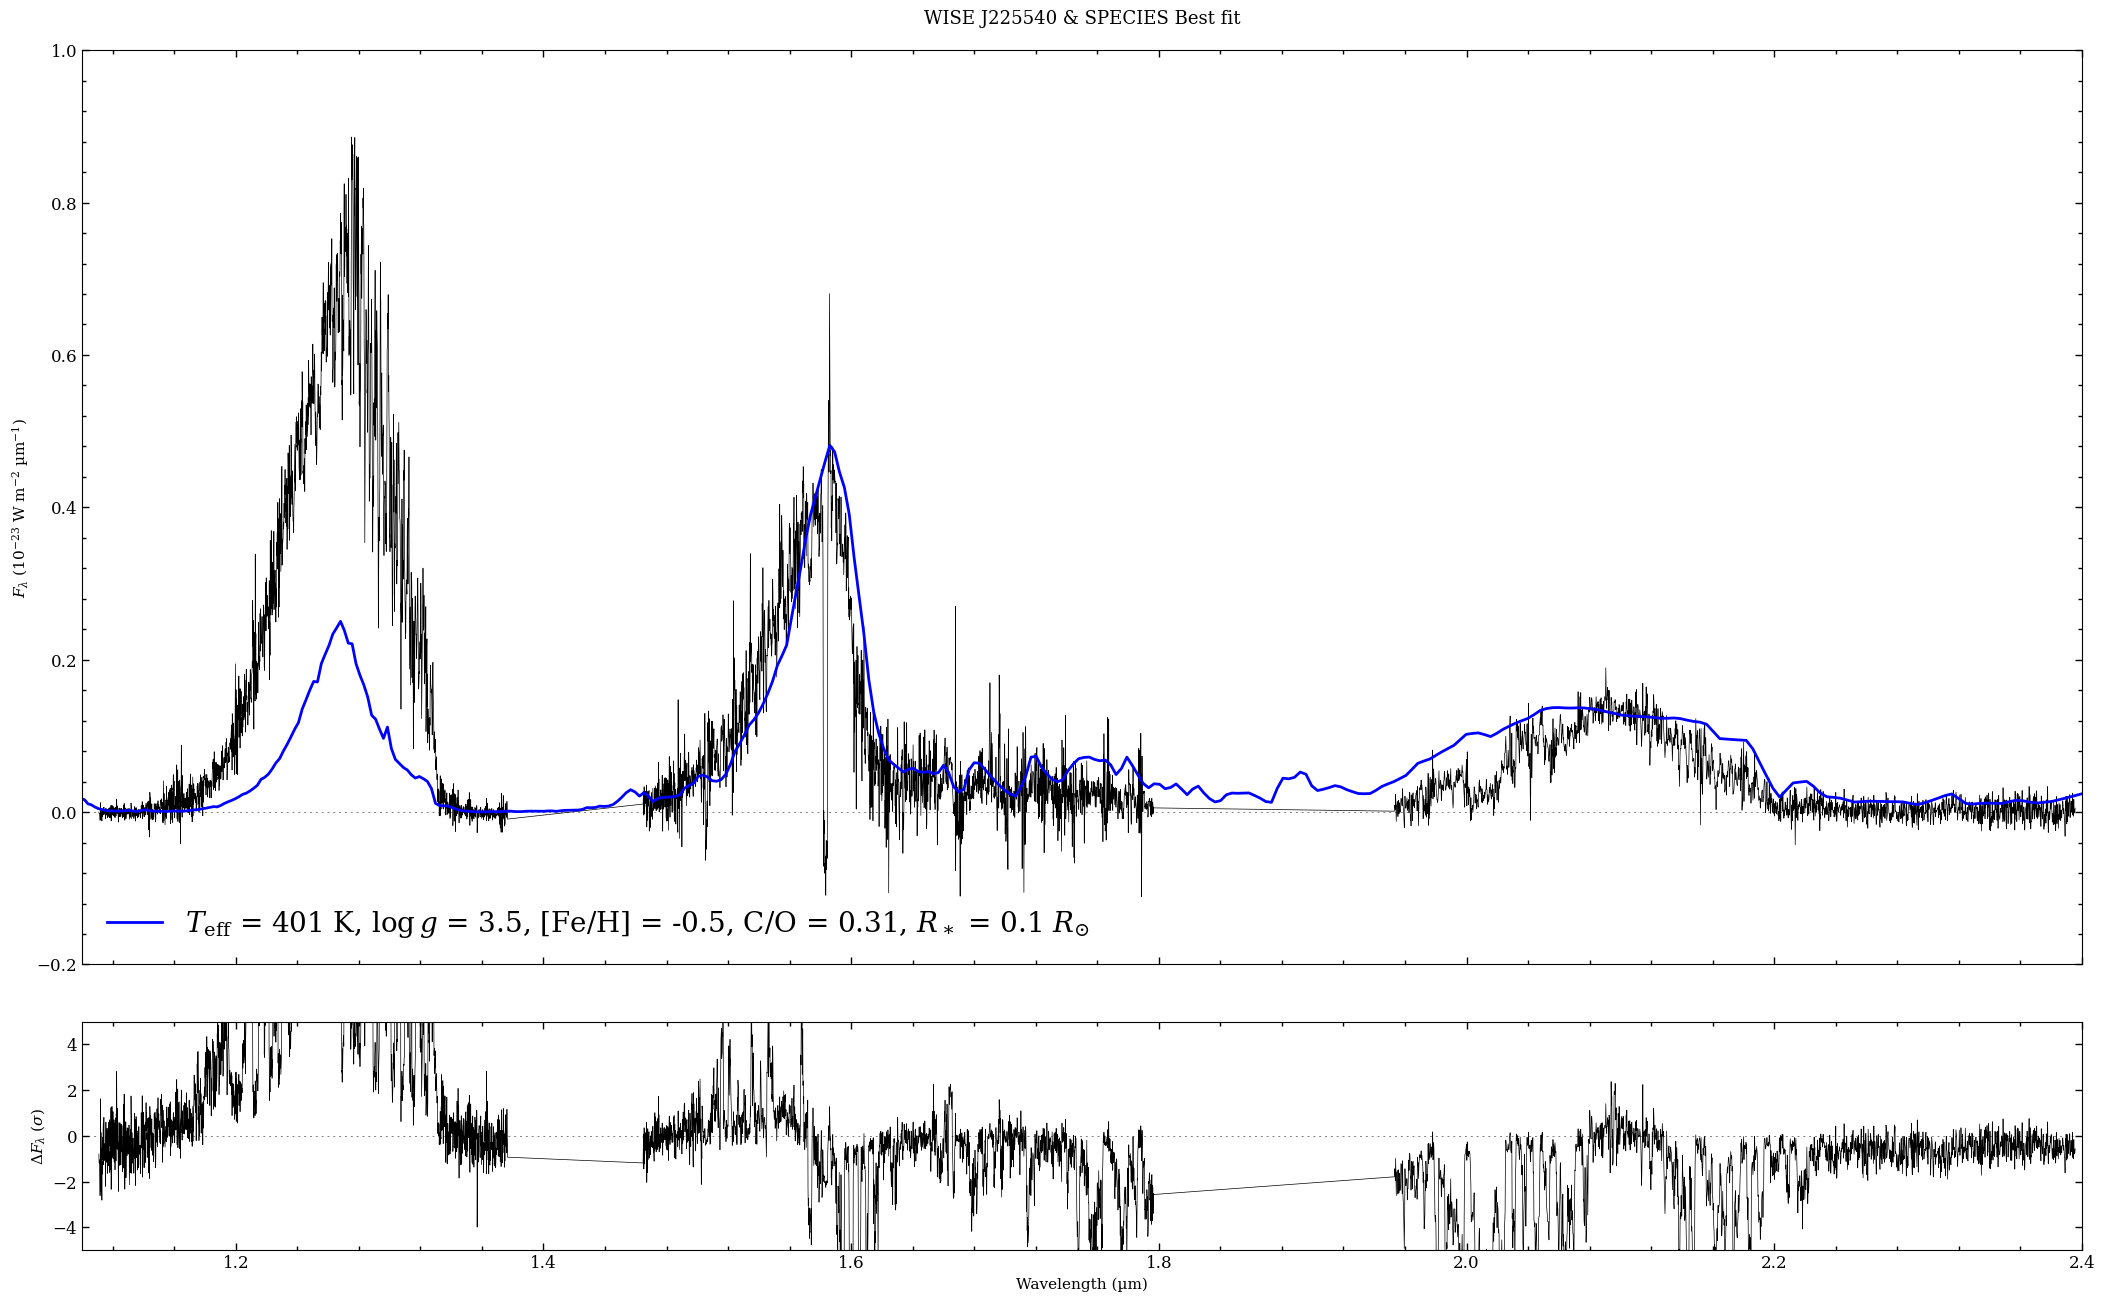

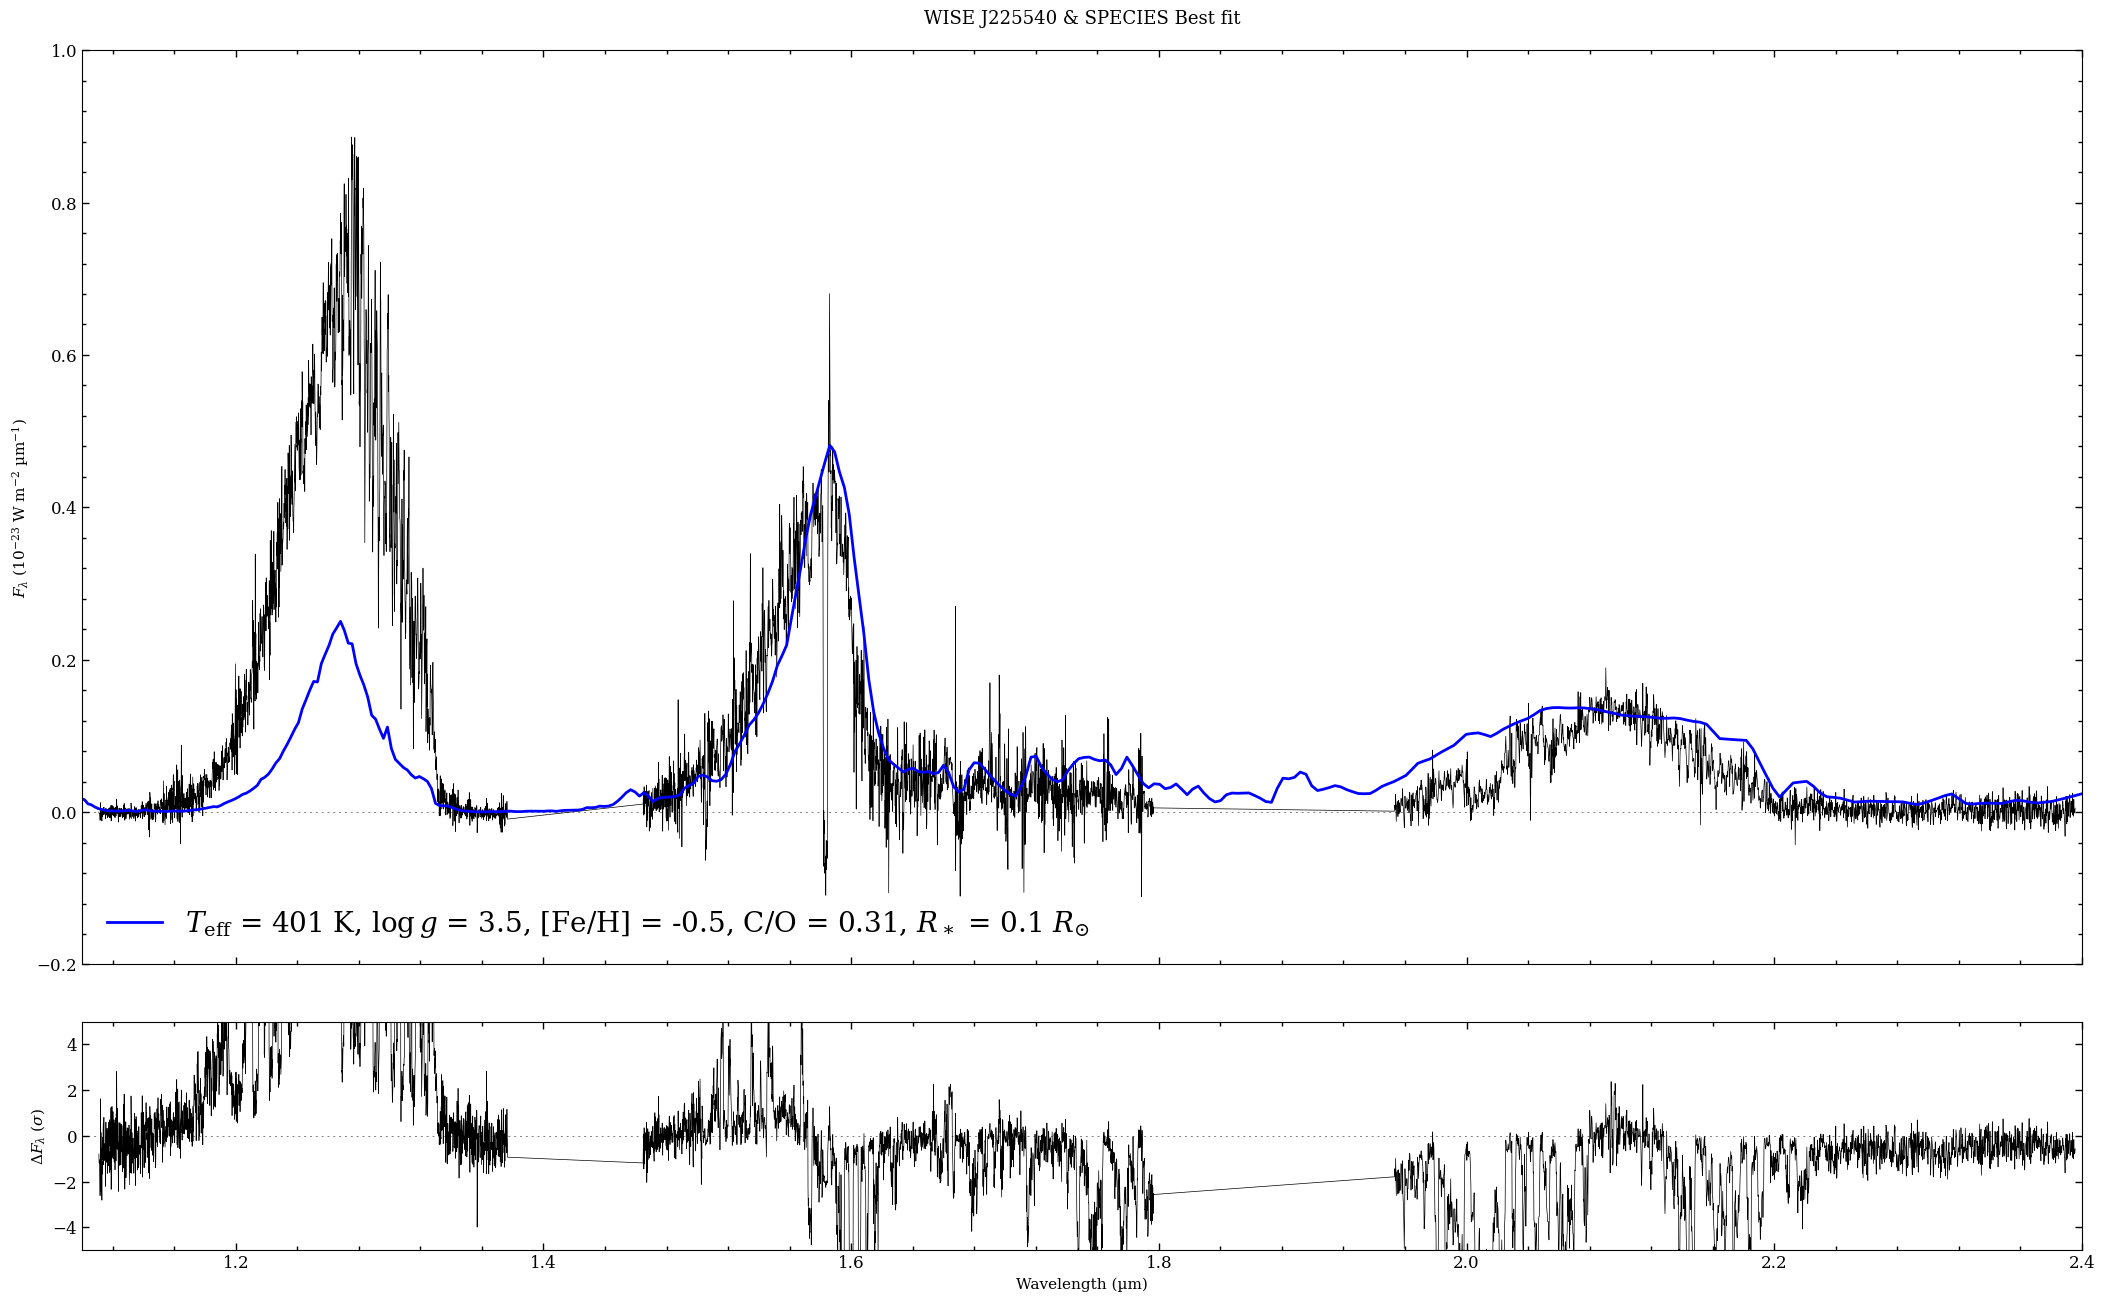

In [26]:
plot_spectrum(boxes = [objectbox, modelbox], quantity = 'flux density', object_type = 'star', residuals = residuals,
              plot_kwargs = [{'MOSFIRE': {'ls': '-', 'lw': 0.5, 'color': 'black'}}, {'ls': '-', 'lw': 2., 'color': 'blue'}],
              legend = [{'loc': 'lower left', 'frameon': False, 'fontsize': 20}, {'loc': 'lower left', 'frameon': False, 'fontsize': 20}],
              output = None, title = 'WISE J225540 & SPECIES Best fit', xlim = (1.1, 2.4), ylim = (-2e-24, 1e-23), figsize = (20, 12))

In [27]:
import numpy as np
model_array = np.array([modelbox.wavelength, modelbox.flux]).T
savepath = './species_bestfit_exo-rem_model.txt'
np.savetxt(savepath, model_array)